# Data Preparation

In [172]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv("takemeout.csv")
df.head()

,Timestamp,Siapa nama kamu?,Cewek atau cowok nih?,Seberapa penting quality time bareng calon pacar untuk kamu?,Seberapa penting physical touch sama calon pacar untuk kamu?,Seberapa penting word of affirmation dari calon pacar untuk kamu?,Seberapa penting dapet kado dari calon pacar untuk kamu?,Seberapa penting bantuan dari calon pacar untuk kamu?
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2
2,2020/10/31 3:39:38 PM GMT+7,Y***********,Cowok,4,3,4,4,4
3,2020/10/31 3:39:42 PM GMT+7,a***,Cowok,5,5,5,2,3
4,2020/10/31 3:39:43 PM GMT+7,B****,Cowok,5,5,5,2,4


In [174]:
df.drop("Timestamp", axis=1, inplace=True)
df.columns = ["nama", "gender", "time", "touch", "word", "gift", "service"]
df.head()

,nama,gender,time,touch,word,gift,service
0,A**************,Cowok,5,5,4,1,3
1,L****,Cewek,5,5,3,2,2
2,Y***********,Cowok,4,3,4,4,4
3,a***,Cowok,5,5,5,2,3
4,B****,Cowok,5,5,5,2,4


In [175]:
# Cek apakah ada yang bernilai null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nama     101 non-null    object
 1   gender   101 non-null    object
 2   time     101 non-null    int64 
 3   touch    101 non-null    int64 
 4   word     101 non-null    int64 
 5   gift     101 non-null    int64 
 6   service  101 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 5.6+ KB


In [176]:
# Cek apakah semua data sudah di range 1 - 5
for col in df.columns[2: ]:
  print(set(df[col].values))

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


In [177]:
# Cek apakah semua gender sudah benar
print(set(df["gender"]))

{'Cewek', 'Cowok'}


Sampai di sini, tidak ditemukan datum yang menyalahi aturan. Data bersih.

# Analisis

In [178]:
df.describe()

,time,touch,word,gift,service
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,4.099010,3.168317,3.722772,2.732673,3.752475
std,1.212476,1.334686,1.209287,1.325829,1.143730
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,3.000000,2.000000,3.000000
50%,5.000000,3.000000,4.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


Nilai min dan max tiap kolom sama, yaitu 1 dan 5, menunjukkan ketertarikan pada masing-masing *love language* sangat bervariasi. Nilai rataan paling tinggi terdapat pada *quality time*.

---------------------------------------------------
Untuk proporsi nilai masing-masing *love language*:

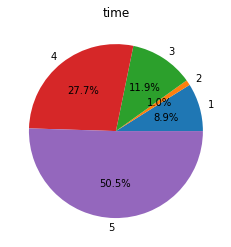

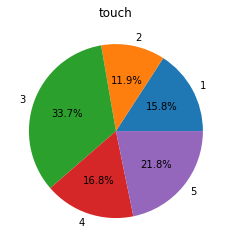

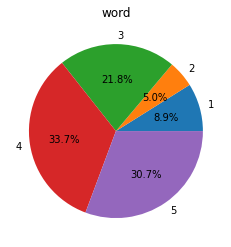

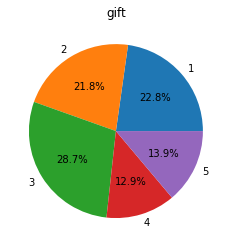

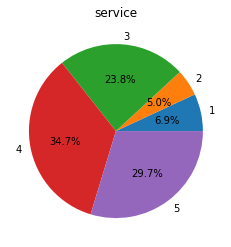

In [179]:
def freqpie(col):
  timefreq = df[col].value_counts(sort=False)
  plt.pie(timefreq.values, labels=timefreq.index, autopct="%1.1f%%")
  plt.title(col)
  plt.show()

for col in df.columns[2: ]:
  freqpie(col)

Pada **time**, **word**, dan **service**, ditemukan peserta yang memberi nilai 4 - 5 sebanyak lebih dari 50%

Sedangkan, pada **touch** dan **gift**, peserta yang memberi nilai 4 - 5 ada kurang dari 50%.

In [180]:
cols = df.columns[2:]
for i in range(len(cols)):
  for j in range(i+1, len(cols)):
    print(f"Correlation of {cols[i]} and {cols[j]}:", end=" ")
    print(df[cols[i]].corr(df[cols[j]]))

Correlation of time and touch: 0.49013196975066076
Correlation of time and word: 0.6668265409012857
Correlation of time and gift: 0.4645200251285621
Correlation of time and service: 0.4360946576784655
Correlation of touch and word: 0.5806182058418959
Correlation of touch and gift: 0.42691037459138176
Correlation of touch and service: 0.1913365823137339
Correlation of word and gift: 0.4460455997814289
Correlation of word and service: 0.4993809161468291
Correlation of gift and service: 0.43733350714314334


Tidak ditemukan kecenderungan yang signifikan antara penilaian-penilaian *Love language*. Di antara itu, yang paling punya korelasi adalah **time** dan **word** (korelasi positif).

In [181]:
# Mengganti kolom gender menjadi numerik
df["gender"] = df["gender"].apply(lambda x: 0 if x=="Cowok" else 1)
# Tabel menurut gender
male = df[df["gender"] == 0]
female = df[df["gender"] == 1]

Sekarang akan dicari tahu bagaimana kemiripan antar entri-entri di data dengan menghitung *Euclidean Distance*. Apabila ada lelaki yang memiliki euclidean distance ke setiap wanita yang kurang dari rata-rata, kita dapat mengatakan lelaki itu kemungkinan tidak akan mendapatkan pasangannya di antara wanita-wanita ini.

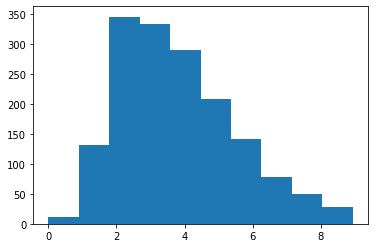

In [182]:
def eudist(i, j):
  # menentukan euclidean distance antar entri i dan j
  # i dan j index pada df, i index si pria, j index si wanita
  x = male.loc[i, "time":"service"]
  y = female.loc[j, "time":"service"]
  return np.linalg.norm(x-y)

nummale = len(male)
numfemale = len(female)
dists = np.zeros(nummale*numfemale)
# Mengisi array dists dengan eudist dari semua pasangan (i, j)
for i in range(nummale):
  for j in range(numfemale):
    dists[numfemale*i + j] = eudist(male.index[i], female.index[j])

plt.hist(dists)
plt.show()

Terlihat bahwa distribusi dari semua Distance yang mungkin pada data menceng ke kanan. Maka daripada menggunakan mean, kita anggap pemusatan data ada di sekitar median.

In [183]:
stddist = np.median(dists)
print(stddist)

3.4641016151377544


In [184]:
jombs4ever = []
for c in range(nummale):
  for r in range(numfemale*c, numfemale*(c+1)):
    if dists[r] < stddist:
      break
  else:
    jombs4ever.append(male.index[c])

print(jombs4ever)
print(male.loc[male.index == jombs4ever[0], "nama"])

[94]
94    B***
Name: nama, dtype: object


Didapatlah hanya satu orang (bernama B\*\*\*) yang *highly unlikely* untuk mendapat pasangan di antara wanita-wanita di sini.

# Model

In [185]:
# Karena jumlah wanita jauh lebih sedikit daripadi lelaki,
# berikan rekomendasi lebih sedikit pada masing-masing lelaki
m_nbrs = NearestNeighbors(n_neighbors=5).fit(
    male.drop(["nama", "gender"], axis=1))
f_nbrs = NearestNeighbors(n_neighbors=2).fit(
    female.drop(["nama", "gender"], axis=1))

In [186]:
# Misal ingin diketahui yang paling cocok dengan lelaki bernama i****
# Indexnya di df adalah 51
apart, ind = f_nbrs.kneighbors(male.loc[male.index==51, "time":"service"],
                  return_distance=True)

# Euclidean Distance ke si wanita
print(apart)

# Nama dari wanita yang cocok itu:
df[df.index.isin(ind[0])]

[[2.44948974 2.64575131]]


,nama,gender,time,touch,word,gift,service
2,Y***********,0,4,3,4,4,4
15,A*,0,4,3,5,4,4
